In [13]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from PIL import Image
import os
import glob
import matplotlib.image as mpimg
from pathlib import Path
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from sklearn.metrics import confusion_matrix

In [21]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define directories
original_data_dir = 'compdata_180_1000/Datasets/old_hungarian'  # Path to your original data directory
base_dir = 'hungarian_180_1000'  # Base directory to save the split data

# Create base directory if it does not exist
if not os.path.exists(base_dir):
    os.mkdir(base_dir)

# Split dataset into training-validation and testing
trainval_dir = os.path.join(base_dir, 'trainval')
test_dir = os.path.join(base_dir, 'test')
os.mkdir(trainval_dir)
os.mkdir(test_dir)

# Move data to trainval and test directories
for class_name in os.listdir(original_data_dir):
    class_dir = os.path.join(original_data_dir, class_name)
    trainval_class_dir = os.path.join(trainval_dir, class_name)
    test_class_dir = os.path.join(test_dir, class_name)
    os.mkdir(trainval_class_dir)
    os.mkdir(test_class_dir)
    filenames = os.listdir(class_dir)
    trainval_filenames, test_filenames = train_test_split(filenames, test_size=0.2, random_state=42)
    for filename in trainval_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(trainval_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in test_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(test_class_dir, filename)
        shutil.copyfile(src, dst)

# Split training-validation set into training and validation
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')
os.mkdir(train_dir)
os.mkdir(val_dir)

for class_name in os.listdir(trainval_dir):
    class_dir = os.path.join(trainval_dir, class_name)
    train_class_dir = os.path.join(train_dir, class_name)
    val_class_dir = os.path.join(val_dir, class_name)
    os.mkdir(train_class_dir)
    os.mkdir(val_class_dir)
    filenames = os.listdir(class_dir)
    train_filenames, val_filenames = train_test_split(filenames, test_size=0.25, random_state=42)  # 60% train, 20% validation
    for filename in train_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(train_class_dir, filename)
        shutil.copyfile(src, dst)
    for filename in val_filenames:
        src = os.path.join(class_dir, filename)
        dst = os.path.join(val_class_dir, filename)
        shutil.copyfile(src, dst)


In [22]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
BATCH_SIZE = 128
IMAGE_WIDTH = 64
IMAGE_HEIGHT = 64
datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% of the data will be used for validation
)

# Load and split data from the same directory
train_generator = datagen.flow_from_directory(
    'hungarian_180_1000/train',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='training'  # Specify 'training' subset for training data
)

validation_generator = datagen.flow_from_directory(
    'hungarian_180_1000/val',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation' )
test_generator = datagen.flow_from_directory(
    'hungarian_180_1000/test',  # Path to your data directory
    target_size=(IMAGE_WIDTH, IMAGE_HEIGHT),
    batch_size=BATCH_SIZE,
    class_mode='categorical',
    subset='validation'  # Specify 'validation' subset for testing data
)

Found 1553 images belonging to 18 classes.
Found 126 images belonging to 18 classes.
Found 126 images belonging to 18 classes.


In [24]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3),activation='relu',input_shape=(64,64, 3)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(18, activation='softmax')
])

# Compile the model
model.compile(optimizer='adadelta', loss='categorical_crossentropy', metrics=['accuracy'],)

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // BATCH_SIZE,
    epochs=10,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // BATCH_SIZE
)

Epoch 1/10


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


12/12 ━━━━━━━━━━━━━━━━━━━━ 5s 237ms/step - accuracy: 0.0529 - loss: 2.9189 - val_accuracy: 0.1111 - val_loss: 2.8827
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0312 - loss: 2.9471 - val_accuracy: 0.1032 - val_loss: 2.8757
Epoch 3/10


C:\Users\haslam2\Anaconda3\envs\l_ml\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 231ms/step - accuracy: 0.0619 - loss: 2.9149 - val_accuracy: 0.0952 - val_loss: 2.8534
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1406 - loss: 2.8787 - val_accuracy: 0.1111 - val_loss: 2.8620
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 224ms/step - accuracy: 0.0731 - loss: 2.8807 - val_accuracy: 0.1190 - val_loss: 2.8481
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0391 - loss: 2.8964 - val_accuracy: 0.1111 - val_loss: 2.8508
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 226ms/step - accuracy: 0.0845 - loss: 2.8747 - val_accuracy: 0.1429 - val_loss: 2.8307
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.1250 - loss: 2.8138 - val_accuracy: 0.1429 - val_loss: 2.8348
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 211ms/step - accuracy: 0.0874 - loss: 2.8436 - val_accuracy: 0.1349 - val_loss: 2.8188
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.1328 - loss: 2.8310 - val_accuracy: 0.1111 - val_los

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 183ms/step


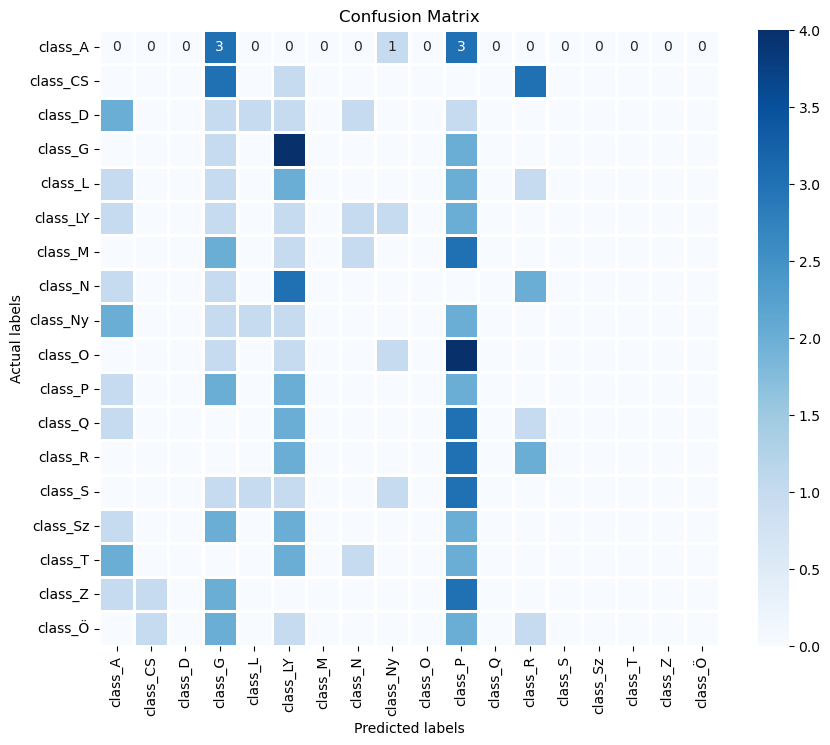

In [25]:
import seaborn as sns
# Generate predictions for the test set
y_pred = model.predict(test_generator)
y_true = test_generator.classes

y_pred_labels = np.argmax(y_pred, axis=1)

# Get class labels
class_labels = list(test_generator.class_indices.keys())

# Get actual class names
actual_class_names = [class_labels[i] for i in y_true]

# Create confusion matrix
cm = confusion_matrix(actual_class_names, [class_labels[i] for i in y_pred_labels])

# Plot confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', linewidths=1, xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
model.save("minst.h5")